Author:  Raphael Cousin

Project: https://github.com/racousin/algorithms_basics_python

# Theory

__Context:__

* Data : $X_1,..,X_n \sim f$ where $f$ is a density with support $I = [a,b]$ 

* Data : $Y_1,...,Y_n$ and $m(.)$ such as $m(x) = \mathbb{E}(Y|X=x)$ 

* estimator: $\hat{m}_h(x)=\sum_{i=1}^n \frac{K_h(x - X_i)}{\sum_{j=1}^n K_h(x - X_j)} Y_i$, with K a kernel function

* sample size: $n$

In [1]:
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

In [2]:
np.random.seed(seed=233423)
n = 10000
gauss = norm(loc=0, scale=1)
rnorm = lambda n : gauss.rvs(n)

In [46]:
class kernel(BaseEstimator, LinearClassifierMixin):
    def __init__(self, h = 0.3, K='gauss'):
        self.h = h
        self.K = K
    def fit(self, X, y):
        opt_tmp = np.sqrt(np.pi)
        if self.K == 'gauss':
            self.f_K = lambda x : np.exp(-x**2)/ opt_tmp
        def f_hat(xs):
            res = np.zeros(len(xs));
            for _,x in enumerate(xs):
                tmp = self.f_K((x - X) / self.h).sum() / self.h
                res[_] = (self.f_K((x - X) / self.h) * y).sum() / self.h / tmp
            return res
        
        self.f_hat = f_hat
        
    def predict(self, x):
        return self.f_hat(x)
    
    def score(self, X, y):
        return np.mean((self.predict(X) - y)**2)
    

    def plot(self, X):
        return np.sign(self.decision_function(X))

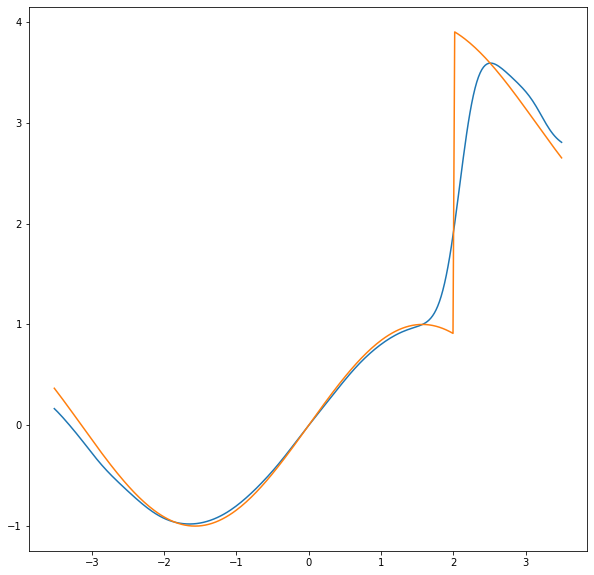

In [47]:
X = rnorm(n)
f = lambda x : np.sin(x) + 3 * (x > 2) 
y = f(X)
kern = kernel()
kern.fit(X,y)
xs = np.linspace(X.min(),X.max(),300)
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(xs, kern.predict(xs))
ax.plot(xs, f(xs))
#ax.plot(X, y,'o')

# cross validation h

In [48]:
from sklearn.model_selection import GridSearchCV

In [59]:
param = {'h':[0.1,0.5,0.9]}
reg = kernel()
gs = GridSearchCV(reg, cv=3,param_grid=param)

In [60]:
gs.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=kernel(K='gauss', h=0.3), iid='warn', n_jobs=None,
             param_grid={'h': [0.1, 0.5, 0.9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [61]:
gs.best_score_

0.13176839318635017

In [62]:
gs.best_params_

{'h': 0.9}

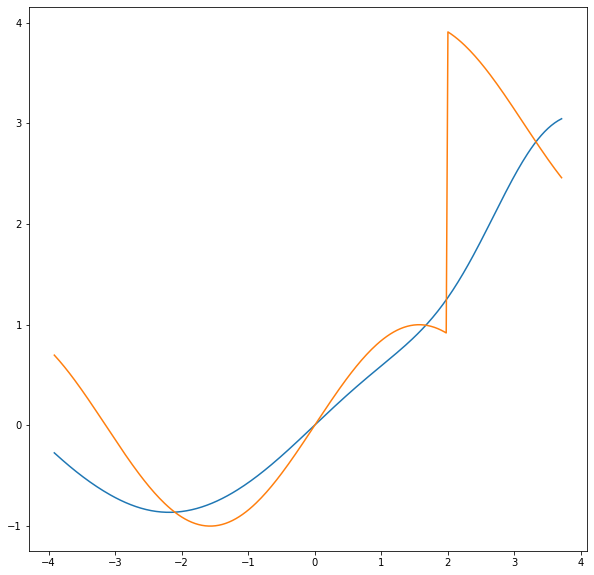

In [63]:
kern = kernel(**gs.best_params_)
kern.fit(X,y)
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(xs, kern.predict(xs))
ax.plot(xs, f(xs))